<a href="https://colab.research.google.com/github/shahjamanbadhon/Deep-Learning/blob/main/Image_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [24]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [25]:
X_test.shape

(10000, 32, 32, 3)

In [26]:
X_train.shape

(50000, 32, 32, 3)

In [27]:
y_train.shape

(50000, 1)

In [28]:
y_test.shape

(10000, 1)

In [29]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [30]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [31]:
y_test = y_test.reshape(-1,)

In [32]:
classes = [ 'airplane','automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [33]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

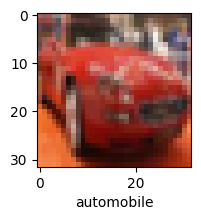

In [34]:
plot_sample(X_train,y_train,5)

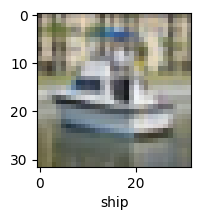

In [35]:
plot_sample(X_train,y_train,501)

In [36]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [37]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 183s 117ms/step - accuracy: 0.3036 - loss: 1.9325
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 156s 100ms/step - accuracy: 0.4213 - loss: 1.6495
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 161s 103ms/step - accuracy: 0.4509 - loss: 1.5539
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 202s 103ms/step - accuracy: 0.4776 - loss: 1.4833
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 203s 103ms/step - accuracy: 0.4974 - loss: 1.4336


In [38]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.33      0.45      1000
           1       0.76      0.39      0.51      1000
           2       0.29      0.43      0.35      1000
           3       0.35      0.24      0.29      1000
           4       0.54      0.15      0.23      1000
           5       0.40      0.35      0.37      1000
           6       0.27      0.87      0.42      1000
           7       0.65      0.41      0.50      1000
           8       0.58      0.64      0.61      1000
           9       0.60      0.48      0.54      1000

    accuracy                           0.43     10000
   macro avg       0.52      0.43      0.43     10000
weighted avg       0.52      0.43      0.43     10000



In [39]:
import seaborn as sns

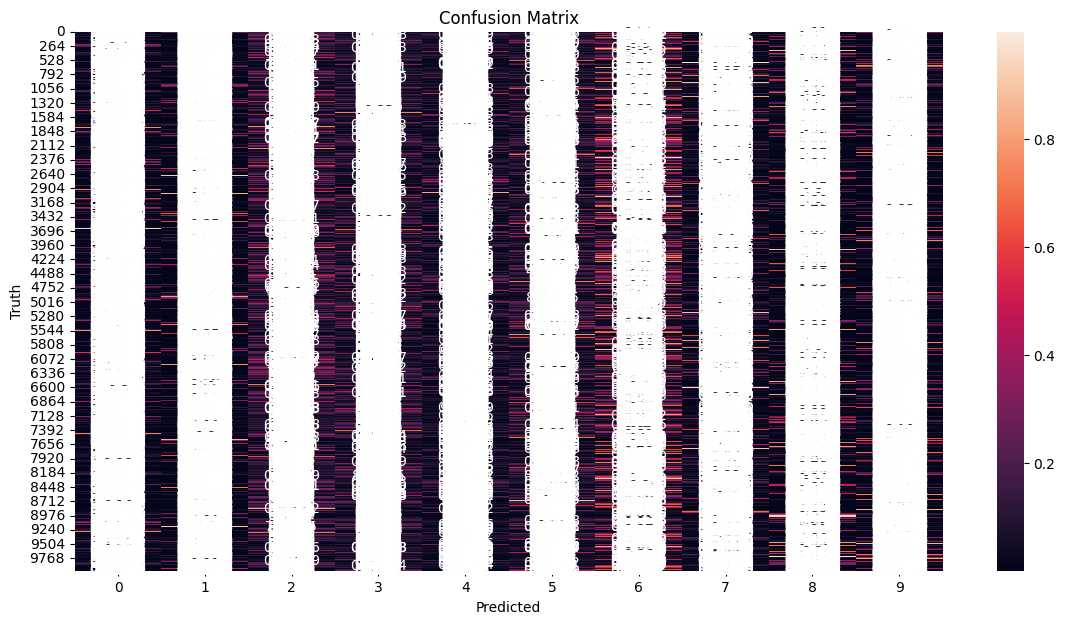

In [40]:
plt.figure(figsize=(14,7))
sns.heatmap(y_pred, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [41]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [43]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 40ms/step - accuracy: 0.3696 - loss: 1.7180
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.5922 - loss: 1.1589
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.6501 - loss: 1.0098
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.6828 - loss: 0.9136
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.7057 - loss: 0.8607
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.7240 - loss: 0.7950
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.7463 - loss: 0.7391
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.7588 - loss: 0.6997
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 41ms/step - accuracy: 0.7710 - loss: 0.6674
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.7791 - loss: 0.6363


In [44]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7032 - loss: 0.8939


[0.9060434699058533, 0.6988999843597412]

In [45]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


array([[7.0030708e-03, 5.5628037e-04, 5.2015488e-03, 4.9826980e-01,
        6.0481336e-02, 3.8542056e-01, 8.9927046e-03, 1.2523885e-02,
        1.5650250e-02, 5.9006228e-03],
       [7.0746779e-04, 6.3125837e-01, 5.7133711e-06, 5.2213732e-06,
        4.0082040e-07, 3.4586087e-08, 1.4970272e-08, 1.5238633e-07,
        3.6760294e-01, 4.1976044e-04],
       [6.2847272e-02, 2.6840785e-01, 3.5825309e-03, 7.4827098e-03,
        3.3632466e-03, 8.3560171e-04, 6.1739038e-04, 2.0677859e-03,
        6.0768425e-01, 4.3111395e-02],
       [9.5555484e-01, 1.3075080e-02, 1.0785024e-02, 1.5223034e-04,
        6.6942870e-05, 1.3405840e-06, 3.3148335e-06, 5.5598506e-05,
        2.0293754e-02, 1.1750391e-05],
       [1.6529154e-04, 8.6350366e-05, 2.3698695e-03, 1.6343702e-02,
        7.6218110e-01, 1.0758849e-03, 2.1673056e-01, 3.9329432e-05,
        8.3496893e-04, 1.7299439e-04]], dtype=float32)

In [46]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(1), np.int64(8), np.int64(0), np.int64(4)]

In [47]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

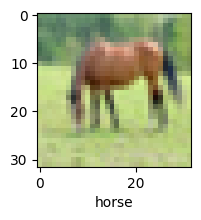

In [58]:
plot_sample(X_test, y_test,60)

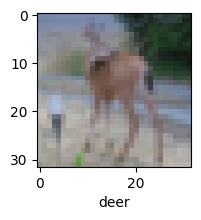

In [50]:
plot_sample(X_test, y_test,100)

In [57]:
classes[y_classes[60]]

'horse'